# **ABOUT DATASET**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. Several constraints were placed on selecting these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### What is Diabetes?
Diabetes is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.


# **OBJECTIVE**
In this project, our goal is to develop a classification model for a diabetes dataset. We aim to create a model that could accurately predict whether a person is sick or not. We will strive to achieve the highest possible validation score for the established model. Ultimately, our objective is to build a machine-learning model that can make precise predictions. The model would help us identify whether the patients in the dataset have diabetes or not.


# **COLUMN DESCRIPTION FOR DIABETES DATA:**
- `Pregnancies`: Number of times pregnant
- `Glucose`: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- `Blood Pressure`: Diastolic blood pressure (mm Hg)
- `Skin Thickness`: Triceps skin fold thickness (mm)
- `Insulin`: 2-Hour serum insulin (mu U/ml)
- `BMI`: Body mass index (weight in kg/(height in m)^2)
- `Diabetes`: Diabetes pedigree function
- `Age`: Age (years)
- `Outcome`: Class variable (0 or 1)

# **Getting Started**

In [46]:
# Import required libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

* `Pandas`: Data analysis and manipulation library for working with structured data using Data Frames and Series.
* `NumPy`: Numerical computing library supporting large, multi-dimensional arrays and matrices, with high-level mathematical functions.
* `Seaborn`: Statistical data visualization library for creating attractive and informative graphics, based on Matplotlib.
* `Matplotlib`: Comprehensive plotting library providing an interface for creating various plots like line, scatter, bar, and histograms.
* `Missingno`: (imported as `msno`) package is great for visualizing missing data.
* `warnings`: Use to manage warnings that Python generates during runtime.

In [47]:
# Import required libraries for prediction

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

* `Train Test Split`: Technique for splitting data into training and testing sets to assess model performance.
* `Logistic Regression`: Method for predicting the probability of a binary outcome using the logistic function.
* `Accuracy`: Metric measuring the proportion of correctly classified instances in a classification model.
* `Sklearn`: Python's Scikit-learn, a powerful machine learning library providing tools for data analysis and model building.

In [48]:
# Loading the dataset

Data= pd.read_csv("E:/DIABETES PATIENTS-20240208T134439Z-001/DIABETES_DATASET.csv")
Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [49]:
Data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [50]:
Data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
#To know more about the dataset with transpose
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


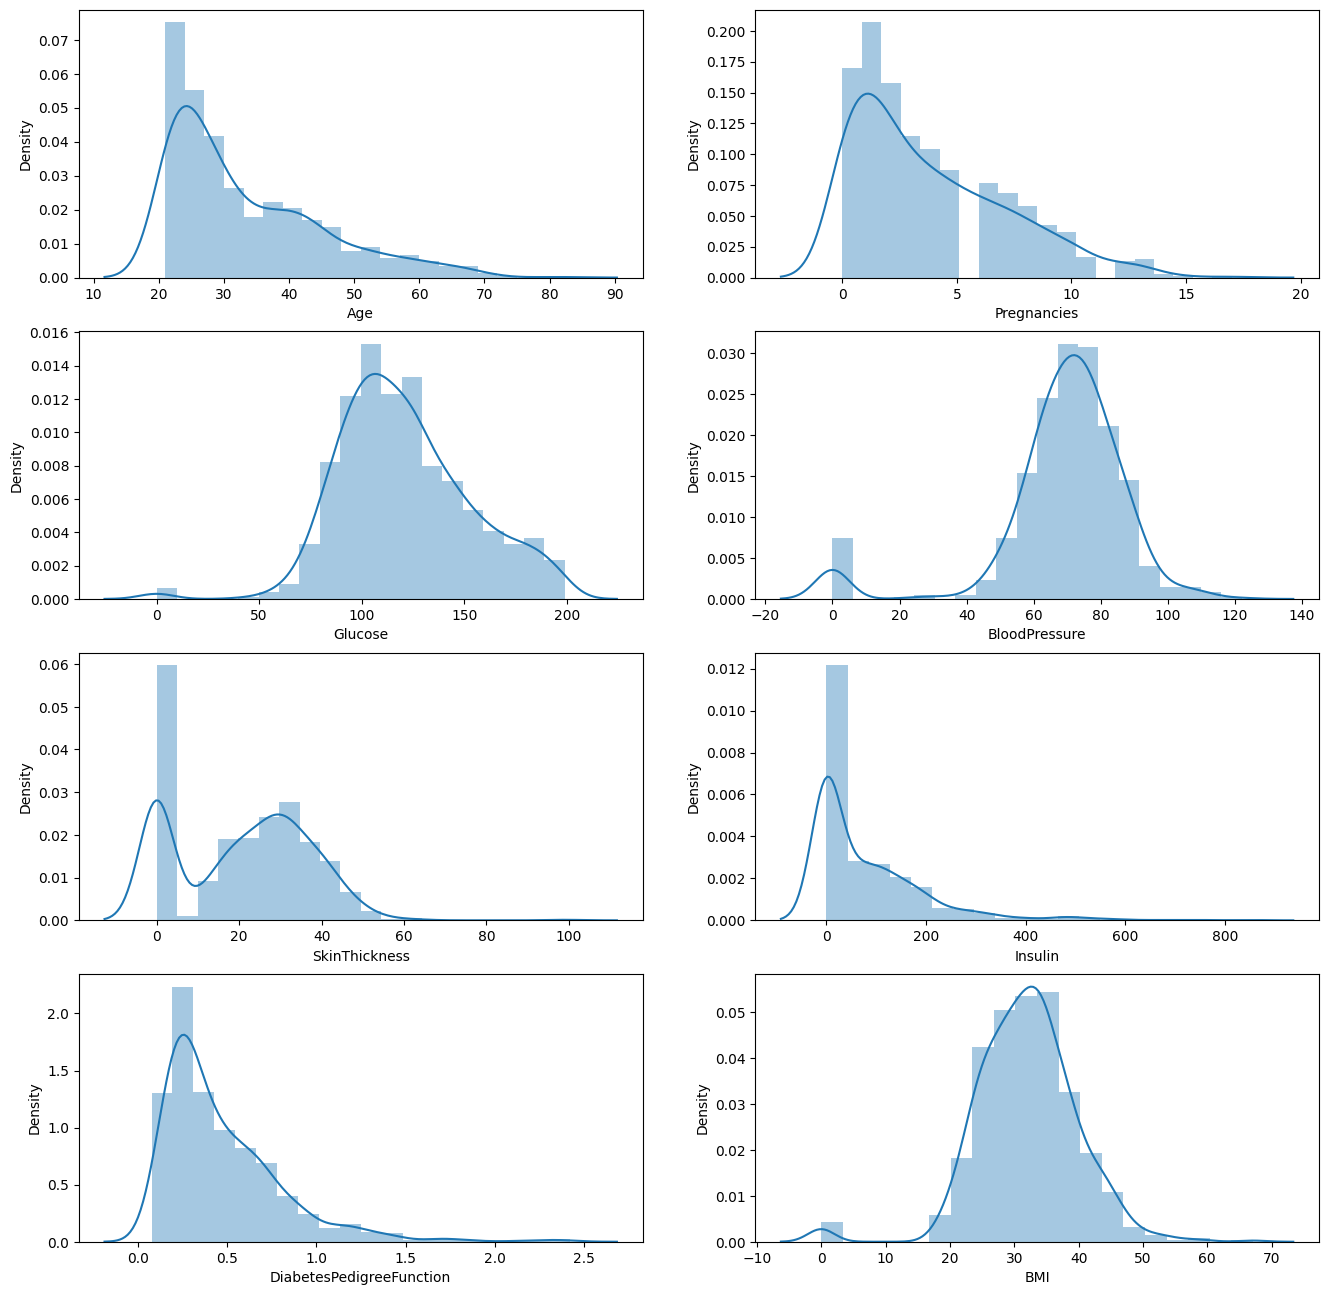

In [52]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(Data.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(Data.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(Data.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(Data.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(Data.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(Data.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(Data.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(Data.BMI, bins = 20, ax=ax[3,1]) 
plt.show()

# **Observation**
* I downloaded and opened my dataset and attempted to understand the type of analysis expected. Upon examination, I discovered that the dataset contains data suitable for predictive analysis.
* Predictive analysis is a type of analysis where this means understanding the probable future trends and behavior
* To derive predictions from the given dataset, I partitioned the data into independent and dependent variables. Upon analysis, I observed that all eight variables i.e. Pregnancies, Glucose, Blood pressure, skin thickness, Insulin, BMI, Diabetes, Age are independent, while 'Outcome' serves as the dependent variable.
* From the given dataset, 0 represents that the person is not diabetic and 1 shows that the person is diabetic.

#### Number of Observation Units: 768
#### Variable Number: 9



# **CHECKING FOR MISSING VALUES**

In [53]:
# Checking for missing values

Data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
Data.shape

(768, 9)

In [55]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [56]:
#checking for total null values

Data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

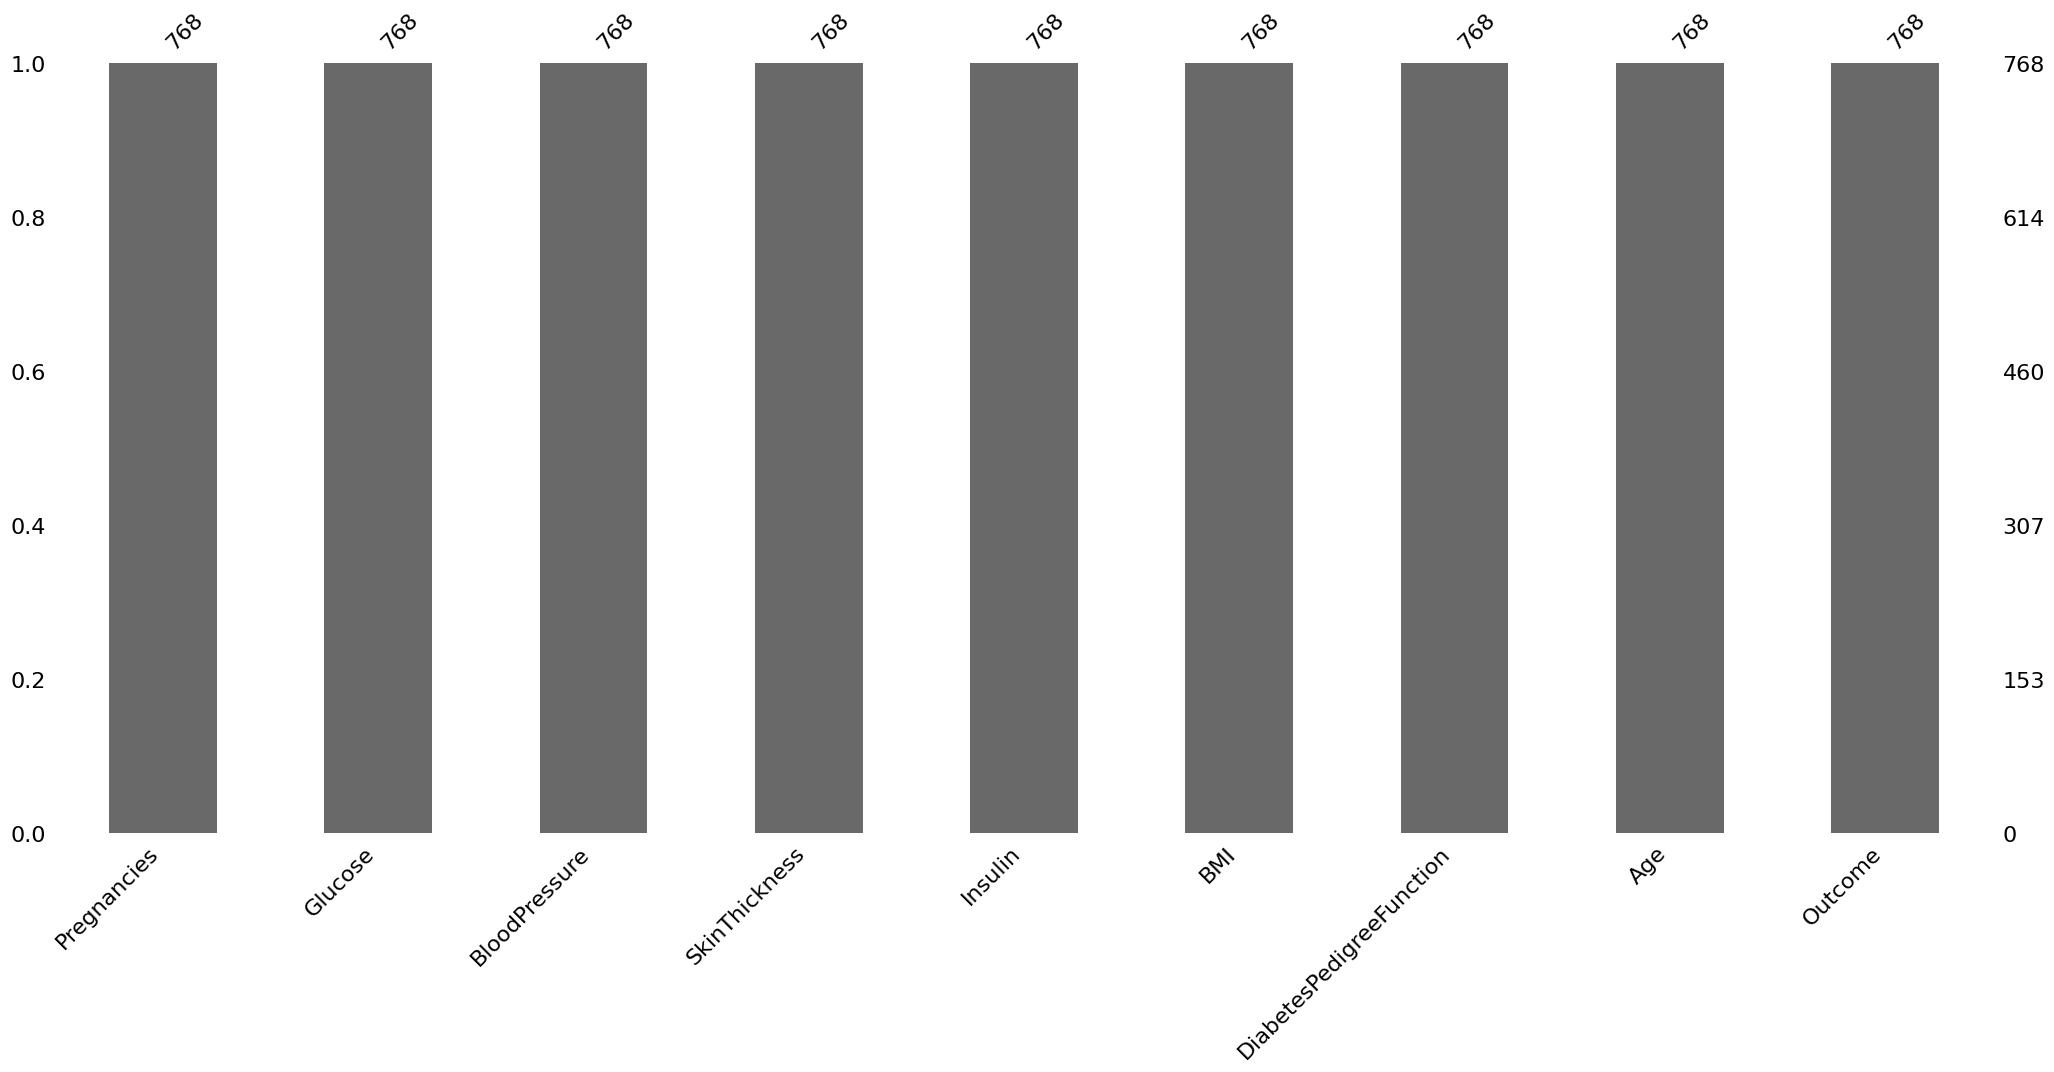

In [57]:
# Have been visualized using the missingno library for the visualization of missing observations.
# Plotting

msno.bar(Data)
plt.show()

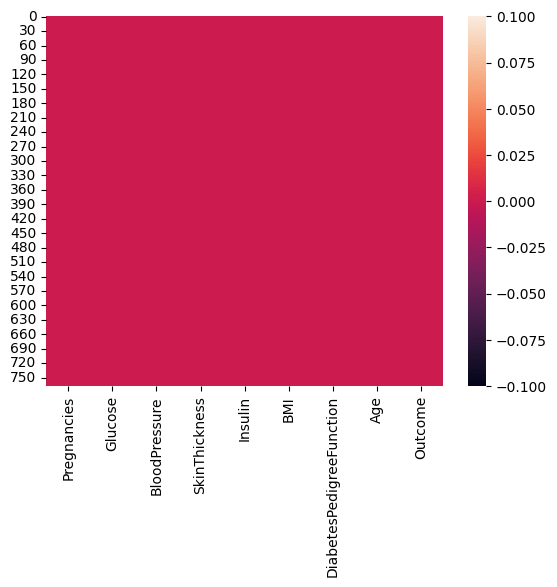

In [58]:
# Have been visualized using the Heatmap from Seaborn Library for the visualization of missing observations.
# Plotting

sns.heatmap(Data.isnull())
plt.show()

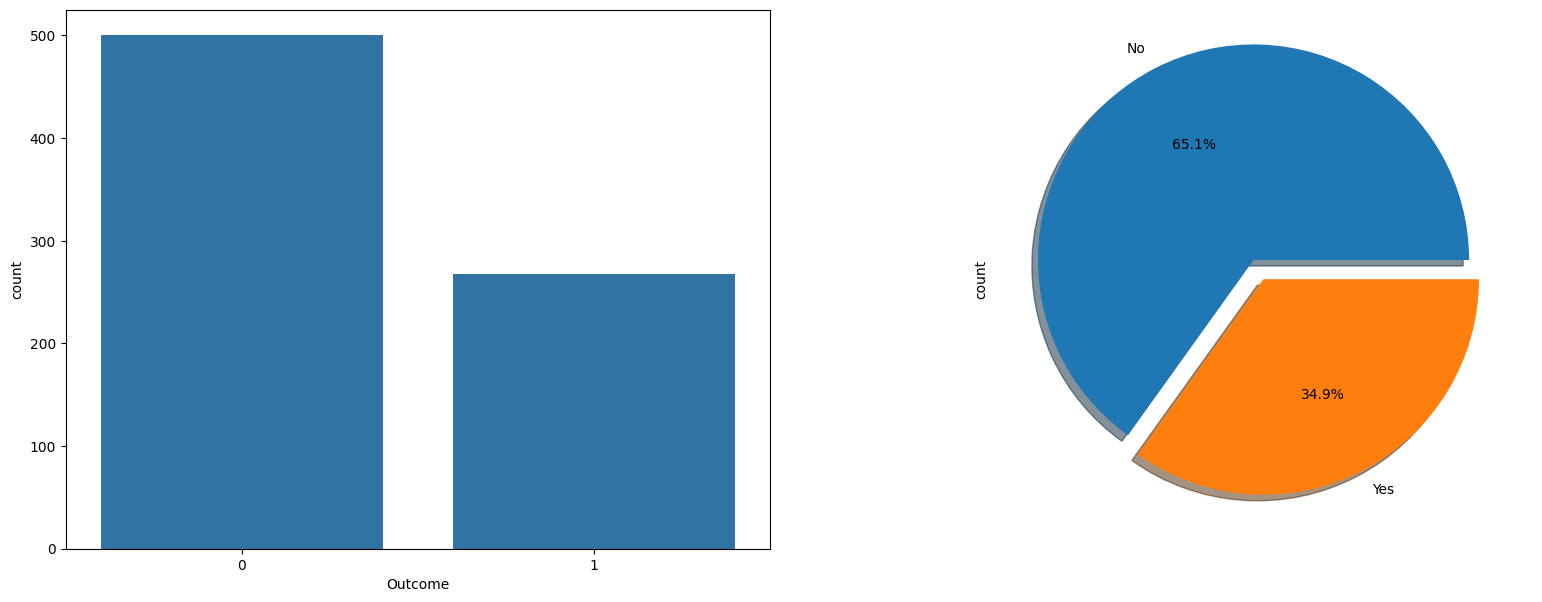

In [64]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(20,7))
sns.countplot(data=Data, x= "Outcome", ax= ax[0])
Data["Outcome"].value_counts().plot.pie(explode= [0.1,0], autopct= "%1.1f%%", labels= ["No","Yes"], shadow= True, ax=ax[1])
plt.show()

#### OBSERVATION FOR MISSING VALUES
* We saw that there are no missing values in the dataset.
* `65.1%` of patients in the dataset do not have diabetes.
* `34.9%` of patients in the dataset have diabetes.

# **CORRELATION MATRIX**

* Access to the correlation of the data set was provided. What kind of relationship is examined between the variables.
* If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
* Correlation = 0 means no correlation.
* If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases.

In [22]:
Correlation= Data.corr()
Correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


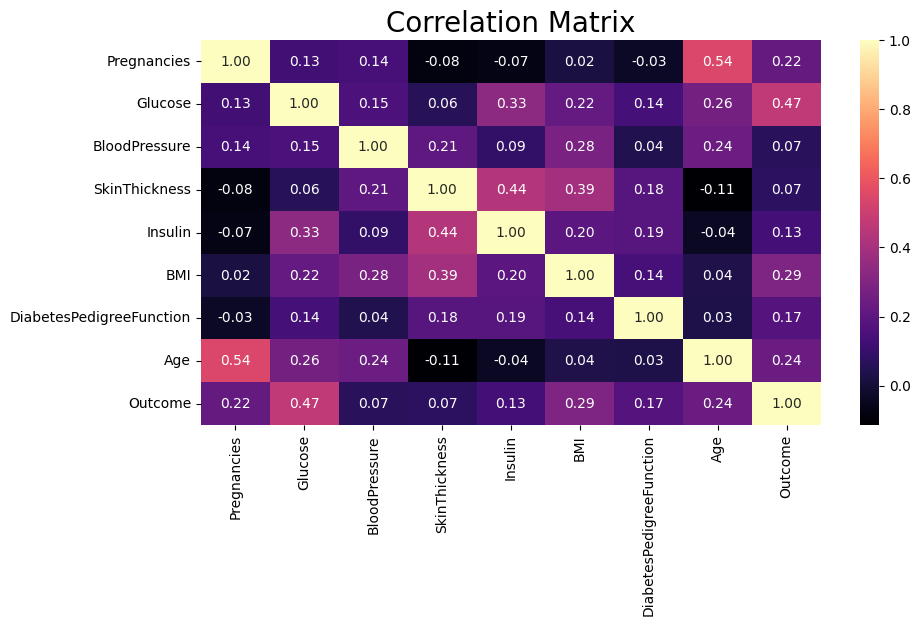

In [23]:
# Visualizing the correlation matrix heatmap using Seaborn and Matplotlib.

f, ax = plt.subplots(figsize= [10,5])
sns.heatmap(Data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

#### OBSERVATION FOR THE CORRELATION

* The Outcome (Target or Dependent Variable) has a moderate positive correlation with Glucose (0.47), BMI (0.29), and Age (0.24) as these increase, the Outcome variable increases.


# **TRAINING THE MODEL WITH THE HELP OF TRAIN TEST SPLIT**

In [24]:
X= Data.iloc[:,:-1]
## Data.iloc[:,:-1] this function drops the last column "Outcome" from the X-axis.

Y= Data.iloc[:,-1]

#### TRAIN THE MODEL
* In X all the independent variables are stored
* In Y the predictor variable(“OUTCOME”) is stored.
* Train-test split is a technique used in machine learning to assess model performance. It divides the dataset into a training set and a testing set,
with a 0.2 test size indicating that 20% of the data is used for testing and 80% for training.

In [25]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=30)

#### Fitting the X train and y train data into the variable called model.

In [26]:
# Create a logistic regression model with a maximum iteration limit of 1000

Model= LogisticRegression(max_iter=1000)
Model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

#### MAKING PREDICTION

In [27]:
Prediction= Model.predict(X_test)
Prediction

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [28]:
# Predictions are made using the test data, which comprises 20% of the total dataset.

# **ACCURACY**

In [29]:
Accuracy= accuracy_score(Prediction, Y_test)
print (Accuracy)

0.7922077922077922


In [30]:
accuracy_decimal = Accuracy
accuracy_percentage = round(accuracy_decimal * 100, 2)
print(f"Accuracy: {accuracy_percentage}%")

Accuracy: 79.22%


#### Accuracy Score Observation

In [31]:
print(f"An accuracy score of {Accuracy} means the model is making correct predictions approximately {accuracy_percentage}% of the time.")

An accuracy score of 0.7922077922077922 means the model is making correct predictions approximately 79.22% of the time.
